🐋 Whale Call Classifier - Complete Model Evaluation & Visualization
✅ Test data loaded: 300 samples, 27 classes
✅ Baseline history loaded
✅ Enhanced history loaded
✅ Custom history loaded
✅ Baseline model loaded


✅ Enhanced model loaded
✅ Custom model loaded

📊 Found 3 training histories and 3 models

📊 MODEL COMPARISON SUMMARY
--------------------------------------------------
       Model                    Architecture Parameters Data Aug LR Schedule Best Val Acc Test Acc Test Acc %
Baseline CNN               3-layer CNN + GAP    162,971       No          No        0.427    0.373      37.3%
Enhanced CNN 8-layer CNN (double conv) + GAP  1,448,443      Yes         Yes        0.464    0.450      45.0%
  Custom CNN  8-layer CNN (custom gen) + GAP  1,448,443      Yes         Yes        0.629    0.577      57.7%

🚀 PERFORMANCE IMPROVEMENTS:
   Enhanced vs Baseline: +7.7 pp (20.5% relative)
   Custom vs Baseline: +20.3 pp (54.5% relative)

📈 GENERATING TRAINING CURVES COMPARISON
--------------------------------------------------


/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_59134/678221476.py:177: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.tight_layout()
/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_59134/678221476.py:178: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.savefig('../results/complete_model_comparison_analysis.png', dpi=300, bbox_inches='tight')
/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


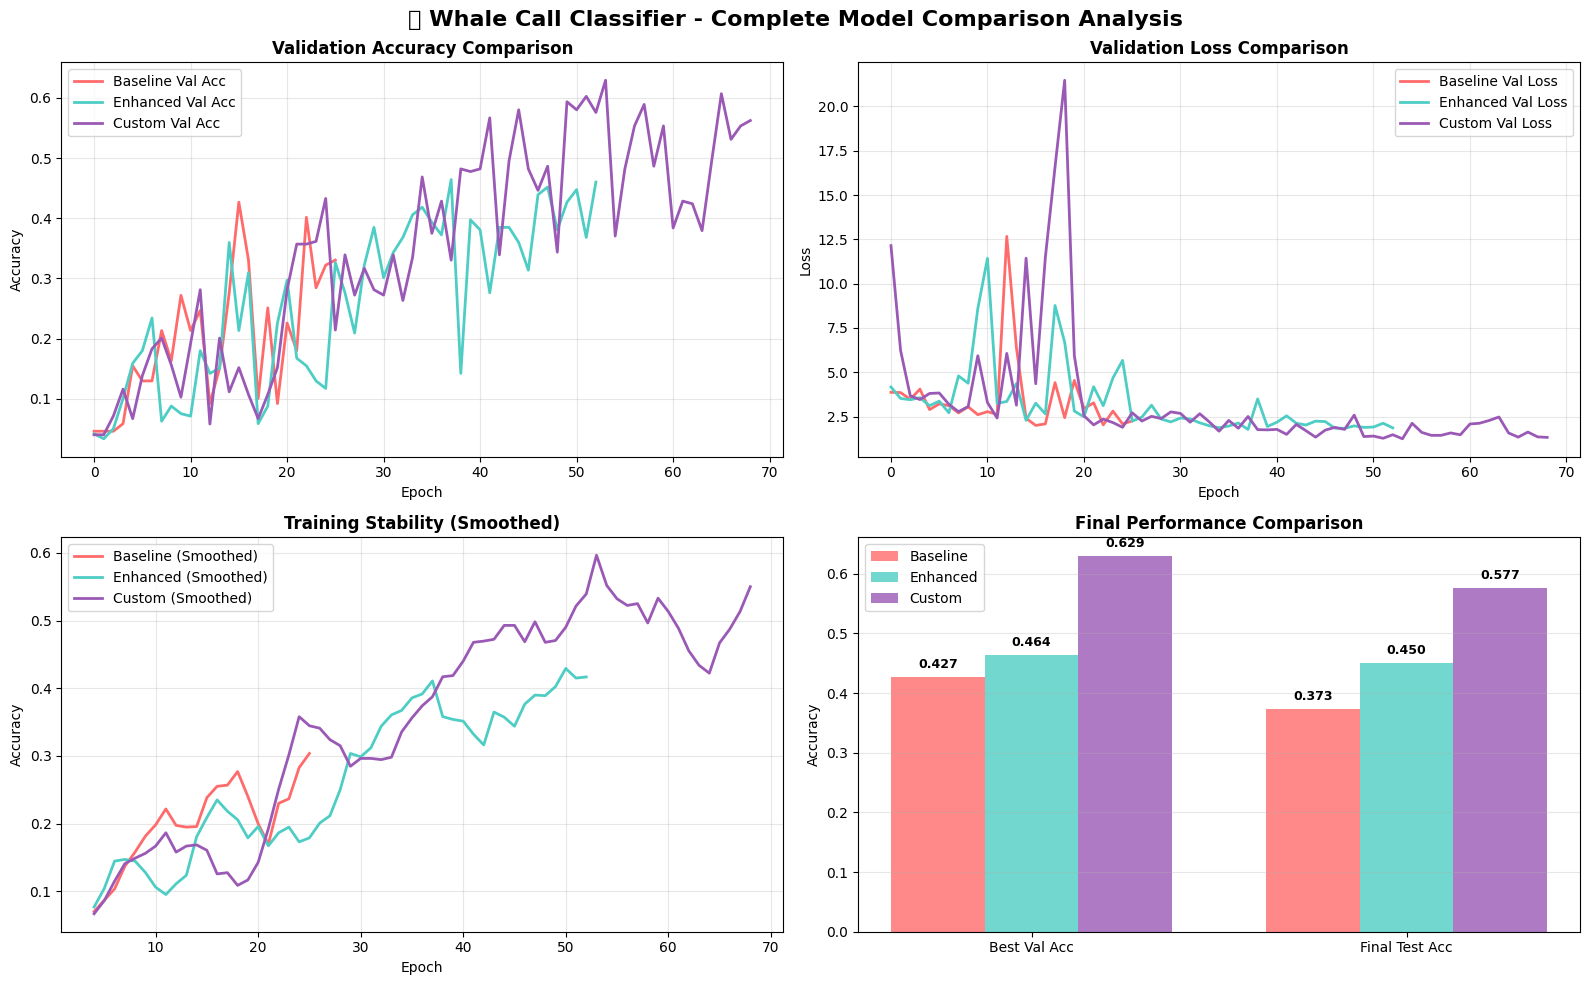

✅ Training curves saved: ../results/complete_model_comparison_analysis.png

🎯 DETAILED PERFORMANCE ANALYSIS
--------------------------------------------------
🏆 Using best model: Custom CNN (Test Acc: 57.67%)
🔮 Generating predictions...

📊 Per-Class Performance (sorted by F1-Score):
                         Species  Support  Precision  Recall  F1-Score
              Fin, Finback Whale        6      1.000   1.000     1.000
                       Harp Seal        9      0.800   0.889     0.842
                    Killer Whale        7      0.750   0.857     0.800
                 Striped Dolphin       15      0.667   0.933     0.778
                       Ross Seal       10      1.000   0.600     0.750
                   Bowhead Whale       12      0.692   0.750     0.720
                  Humpback Whale       12      0.625   0.833     0.714
        Atlantic Spotted Dolphin       12      0.545   1.000     0.706
            White-beaked Dolphin       11      0.524   1.000     0.688
      

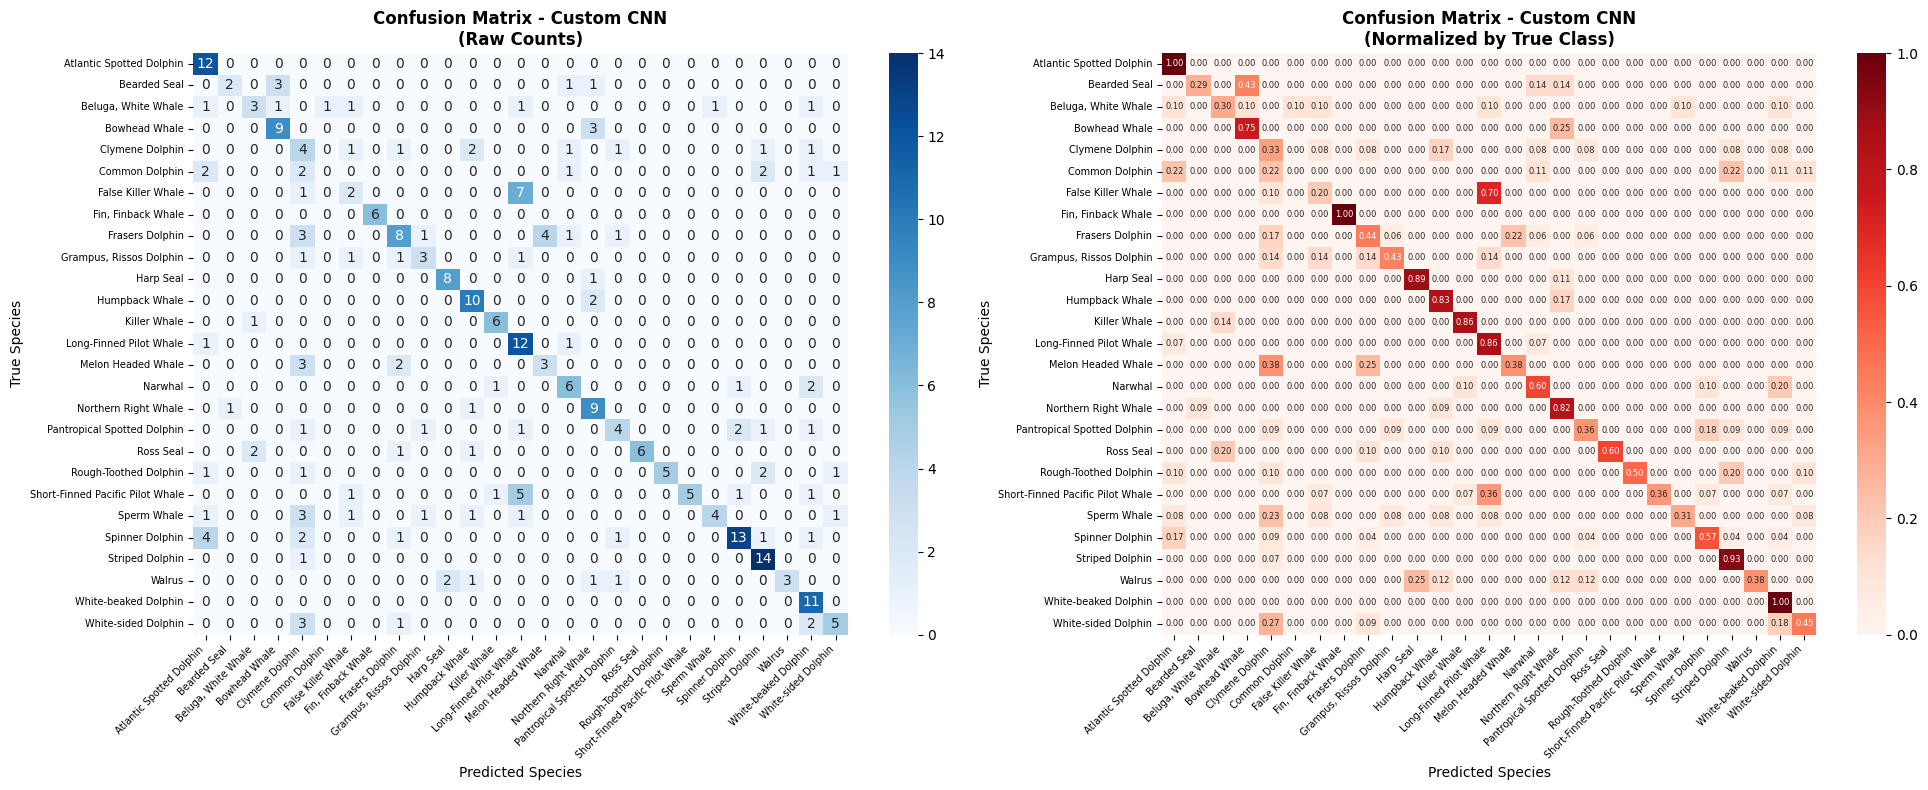

✅ Confusion matrix saved: ../results/best_model_confusion_matrix.png

🔍 Most Confused Species Pairs:
----------------------------------------
                    True Species        Predicted Species  Count  Rate
              False Killer Whale  Long-Finned Pilot Whale      7 0.700
Short-Finned Pacific Pilot Whale  Long-Finned Pilot Whale      5 0.357
                 Frasers Dolphin       Melon Headed Whale      4 0.222
                 Spinner Dolphin Atlantic Spotted Dolphin      4 0.174
                 Frasers Dolphin          Clymene Dolphin      3 0.167
              Melon Headed Whale          Clymene Dolphin      3 0.375
                   Bowhead Whale     Northern Right Whale      3 0.250
                    Bearded Seal            Bowhead Whale      3 0.429
                     Sperm Whale          Clymene Dolphin      3 0.231
             White-sided Dolphin          Clymene Dolphin      3 0.273

📊 GENERATING INDIVIDUAL TRAINING PLOTS
-------------------------------------

/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_59134/678221476.py:358: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.tight_layout()
/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_59134/678221476.py:361: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.savefig(filename, dpi=300, bbox_inches='tight')
/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


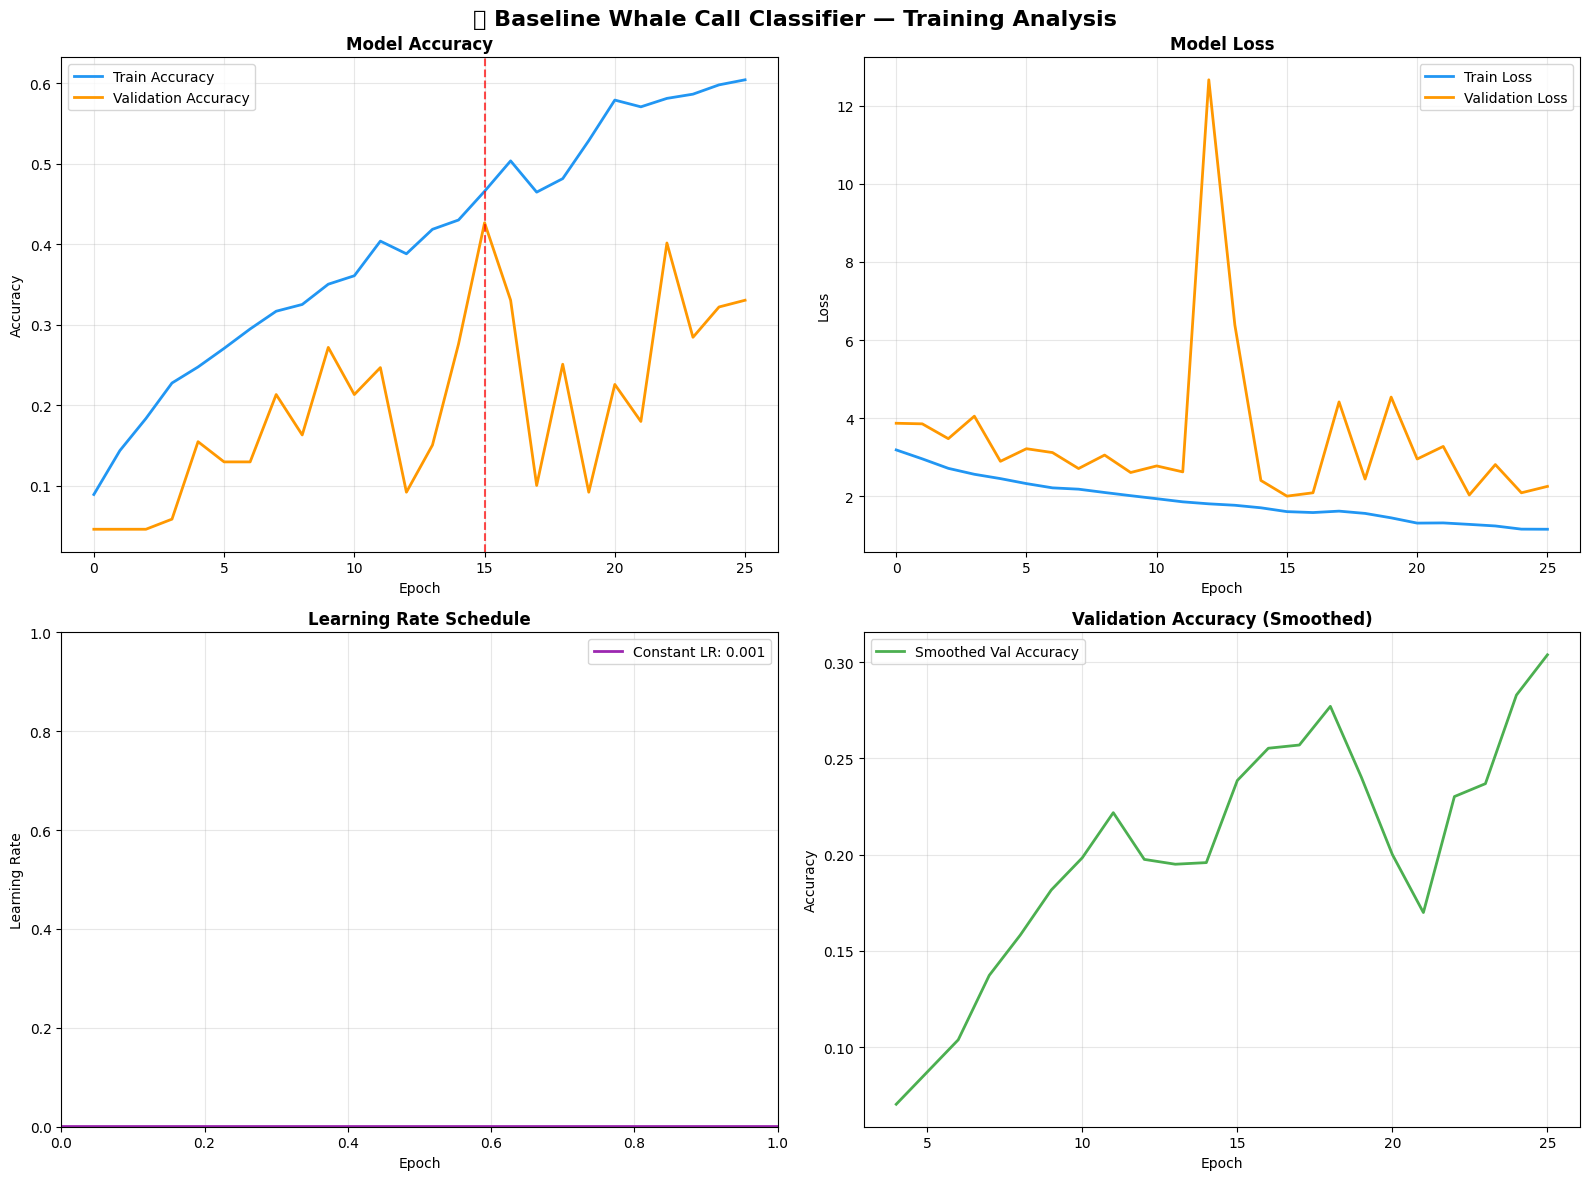

✅ Individual training plot saved: ../results/baseline_training_analysis.png


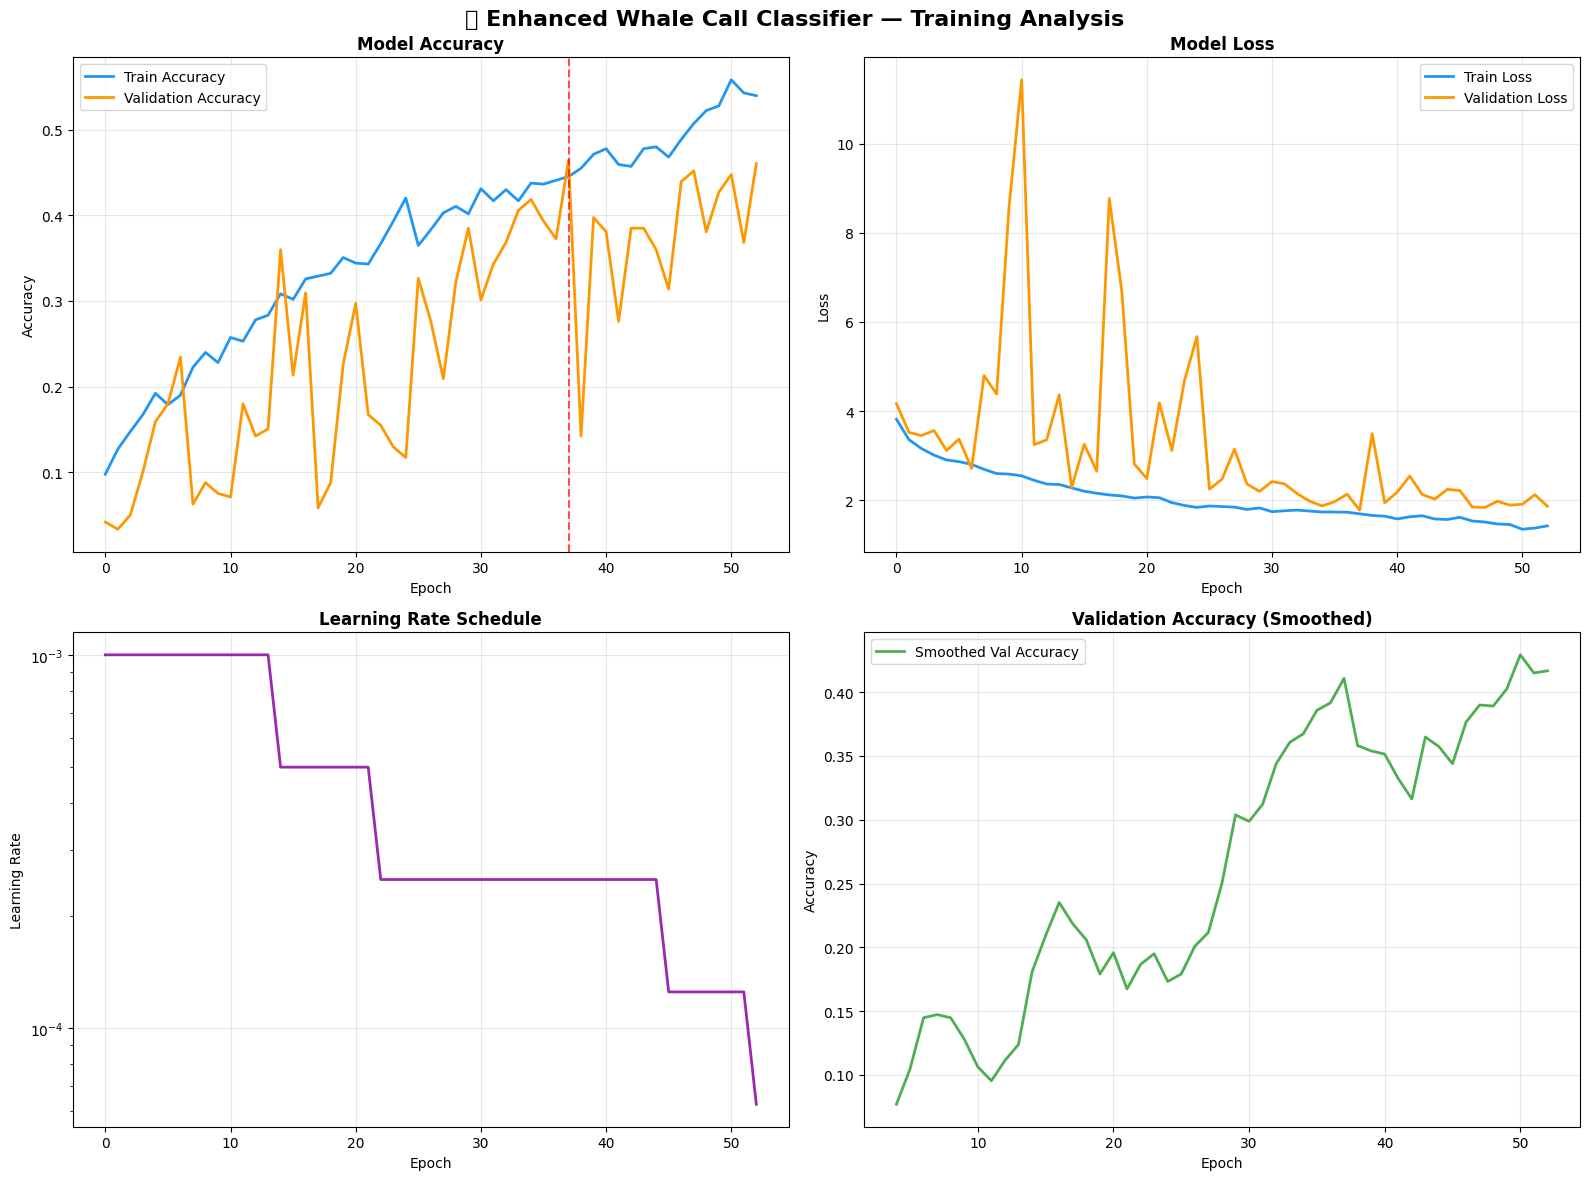

✅ Individual training plot saved: ../results/enhanced_training_analysis.png


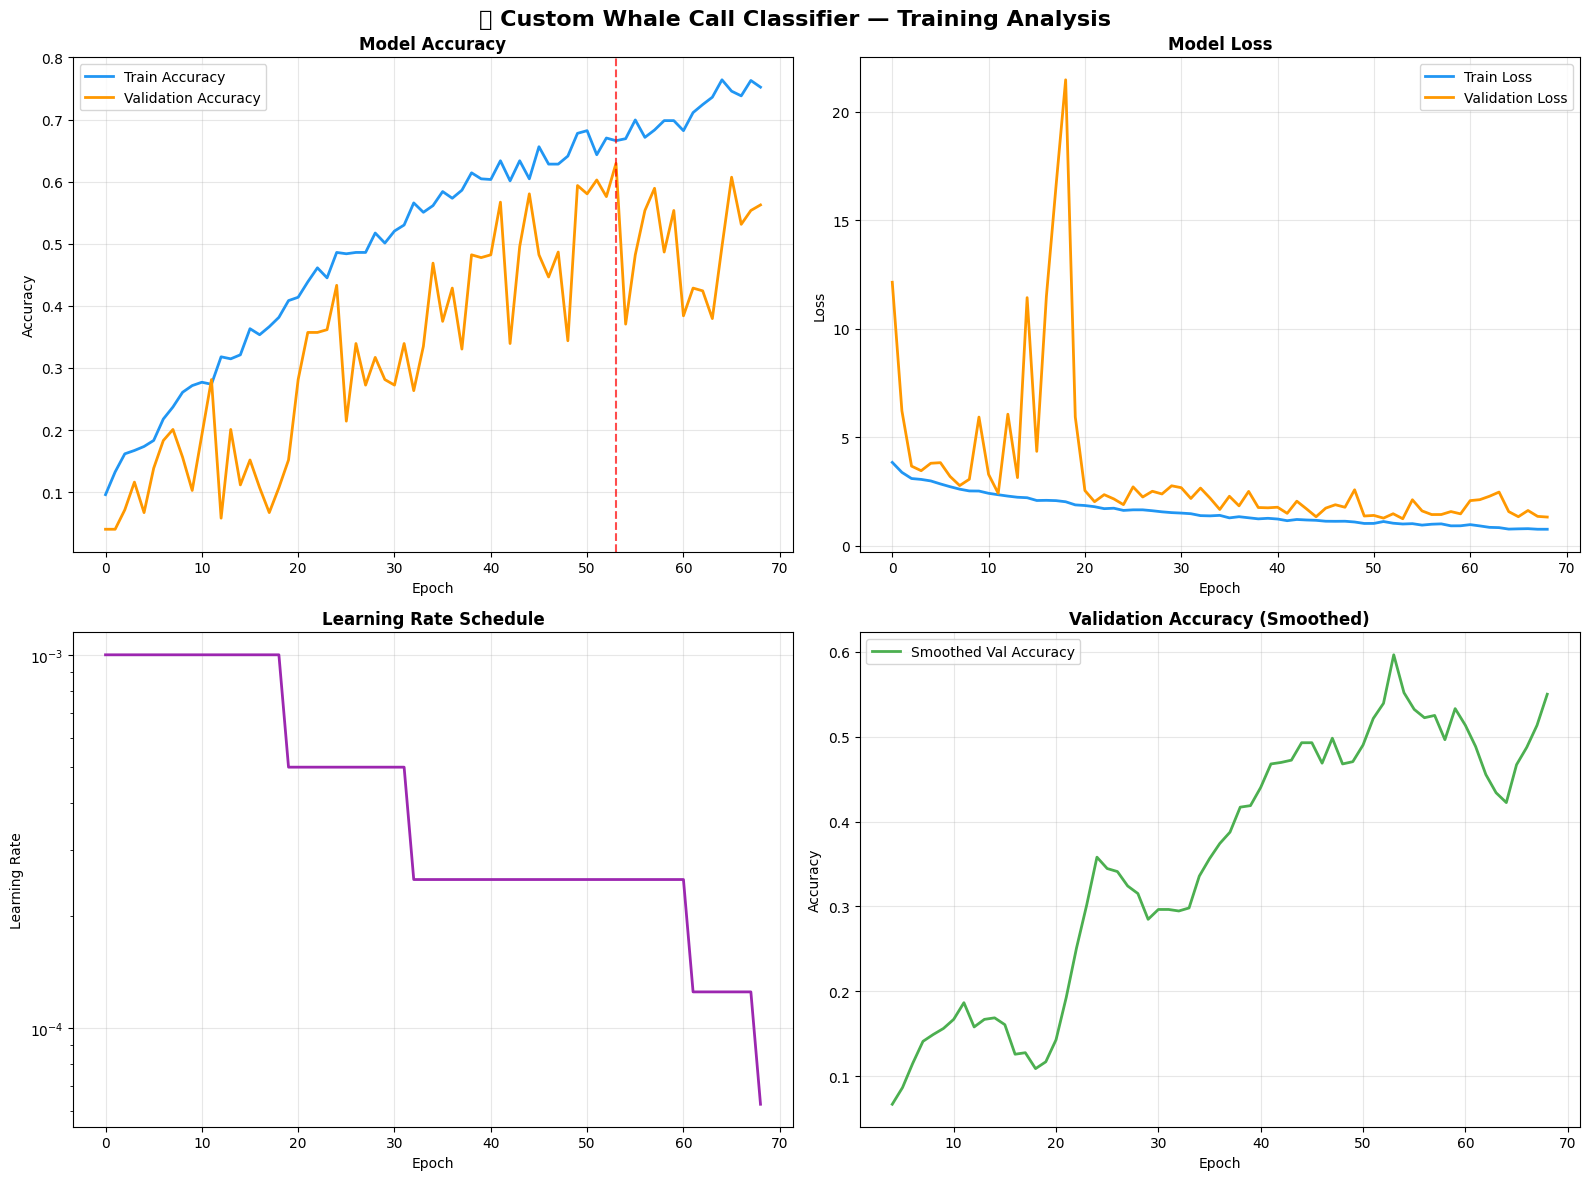

✅ Individual training plot saved: ../results/custom_training_analysis.png

💾 SAVING COMPREHENSIVE EVALUATION REPORT
--------------------------------------------------
✅ Final evaluation report saved: ../results/final_evaluation_report.json

🎯 FINAL EVALUATION SUMMARY
📊 Dataset: 300 test samples across 27 whale species
🏆 Models Evaluated: 3
   Baseline: 37.33% test accuracy
   Enhanced: 45.00% test accuracy
   Custom: 57.67% test accuracy

🏆 Best Model: Custom CNN
🎯 Test Accuracy: 57.67%
📈 Macro F1-Score: 0.561

📁 Generated Files:
   ✅ ../results/complete_model_comparison_analysis.png
   ✅ ../results/best_model_confusion_matrix.png
   ✅ ../results/baseline_training_analysis.png
   ✅ ../results/enhanced_training_analysis.png
   ✅ ../results/custom_training_analysis.png
   ✅ ../results/final_evaluation_report.json

🐋 Complete whale call classification model evaluation finished!


In [11]:
# 🎯 Complete Model Evaluation and Visualization Generation
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pandas as pd

print("🐋 Whale Call Classifier - Complete Model Evaluation & Visualization")
print("="*70)

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Load test data
try:
    X_test = np.load('../data/processed/X_test.npy')
    y_test = np.load('../data/processed/y_test.npy')
    
    with open('../data/processed/species_mapping.pkl', 'rb') as f:
        species_to_int = pickle.load(f)
    
    int_to_species = {v: k for k, v in species_to_int.items()}
    species_names = [int_to_species[i].replace('_', ' ') for i in range(len(species_to_int))]
    
    print(f"✅ Test data loaded: {X_test.shape[0]} samples, {len(species_to_int)} classes")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    raise

# Load all training histories
histories = {}
history_files = {
    'baseline': '../results/training_history.json',
    'enhanced': '../results/enhanced_training_history.json', 
    'custom': '../results/custom_training_history.json'
}

for name, file_path in history_files.items():
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            histories[name] = json.load(f)
        print(f"✅ {name.capitalize()} history loaded")

# Load all models
models = {}
model_files = {
    'baseline': '../models/best_model.keras',
    'enhanced': '../models/best_enhanced_model.keras',
    'custom': '../models/best_custom_model.keras'
}

try:
    import tensorflow as tf
    for name, file_path in model_files.items():
        if os.path.exists(file_path):
            models[name] = tf.keras.models.load_model(file_path)
            print(f"✅ {name.capitalize()} model loaded")
except Exception as e:
    print(f"⚠️ Error loading models: {e}")

print(f"\n📊 Found {len(histories)} training histories and {len(models)} models")

# 1. Generate Model Comparison Summary Table
print("\n" + "="*70)
print("📊 MODEL COMPARISON SUMMARY")
print("-"*50)

# Architecture label mapping (from saved history keys → human-readable)
arch_labels = {
    '3_layer_cnn_with_flatten':     '3-layer CNN + GAP',
    'double_conv_blocks_with_gap':  '8-layer CNN (double conv) + GAP',
    'custom_spectrogram_generator': '8-layer CNN (custom gen) + GAP',
}

models_data = []
for name in ['baseline', 'enhanced', 'custom']:
    if name in histories:
        history = histories[name]
        arch_key = history.get('architecture', '')
        arch_label = arch_labels.get(arch_key, arch_key)  # fallback to raw key
        models_data.append({
            'Model': f'{name.capitalize()} CNN',
            'Architecture': arch_label,
            'Parameters': f"{history.get('total_parameters', 'N/A'):,}" if history.get('total_parameters') else 'N/A',
            'Data Aug': 'No' if name == 'baseline' else 'Yes',
            'LR Schedule': 'No' if name == 'baseline' else 'Yes',
            'Best Val Acc': f"{history['best_val_accuracy']:.3f}",
            'Test Acc': f"{history['final_test_accuracy']:.3f}",
            'Test Acc %': f"{history['final_test_accuracy']*100:.1f}%"
        })

if models_data:
    df_comparison = pd.DataFrame(models_data)
    print(df_comparison.to_string(index=False))
    
    # Performance improvements
    if len(models_data) >= 2:
        print(f"\n🚀 PERFORMANCE IMPROVEMENTS:")
        baseline_acc = histories['baseline']['final_test_accuracy'] if 'baseline' in histories else 0
        
        for name in ['enhanced', 'custom']:
            if name in histories and 'baseline' in histories:
                acc = histories[name]['final_test_accuracy']
                improvement = (acc - baseline_acc) * 100
                relative_improvement = ((acc - baseline_acc) / baseline_acc) * 100
                print(f"   {name.capitalize()} vs Baseline: +{improvement:.1f} pp ({relative_improvement:.1f}% relative)")
# 2. Generate Training Curves Comparison
print(f"\n📈 GENERATING TRAINING CURVES COMPARISON")
print("-"*50)

if len(histories) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    colors = ['#FF6B6B', '#4ECDC4', '#9B59B6']  # Red, Teal, Purple
    
    history_items = list(histories.items())
    
    # Validation Accuracy comparison
    for i, (name, history) in enumerate(history_items):
        axes[0,0].plot(history['val_accuracy'], label=f'{name.capitalize()} Val Acc', 
                       color=colors[i], linewidth=2)
    axes[0,0].set_title('Validation Accuracy Comparison', fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Validation Loss comparison
    for i, (name, history) in enumerate(history_items):
        axes[0,1].plot(history['val_loss'], label=f'{name.capitalize()} Val Loss', 
                       color=colors[i], linewidth=2)
    axes[0,1].set_title('Validation Loss Comparison', fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Training stability (smoothed)
    for i, (name, history) in enumerate(history_items):
        if len(history['val_accuracy']) >= 5:
            smoothed = np.convolve(history['val_accuracy'], np.ones(5)/5, mode='valid')
            axes[1,0].plot(range(4, len(history['val_accuracy'])), smoothed,
                           color=colors[i], linewidth=2, label=f'{name.capitalize()} (Smoothed)')
    axes[1,0].set_title('Training Stability (Smoothed)', fontweight='bold')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Performance bar chart
    metrics = ['Best Val Acc', 'Final Test Acc']
    x = np.arange(len(metrics))
    width = 0.25
    
    for i, (name, history) in enumerate(history_items):
        vals = [history['best_val_accuracy'], history['final_test_accuracy']]
        offset = (i - len(history_items)/2 + 0.5) * width
        bars = axes[1,1].bar(x + offset, vals, width, label=name.capitalize(), color=colors[i], alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(vals):
            axes[1,1].text(j + offset, val + 0.01, f'{val:.3f}', 
                          ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    axes[1,1].set_title('Final Performance Comparison', fontweight='bold')
    axes[1,1].set_ylabel('Accuracy')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(metrics)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('🐋 Whale Call Classifier - Complete Model Comparison Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('../results/complete_model_comparison_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Training curves saved: ../results/complete_model_comparison_analysis.png")

# 3. Detailed Performance Analysis with Best Model
print(f"\n🎯 DETAILED PERFORMANCE ANALYSIS")
print("-"*50)

# Find best model
best_model = None
model_name = "No Model"
best_test_acc = 0

for name in ['custom', 'enhanced', 'baseline']:  # Priority order
    if name in models and name in histories:
        test_acc = histories[name]['final_test_accuracy']
        if test_acc > best_test_acc:
            best_model = models[name]
            model_name = f"{name.capitalize()} CNN"
            best_test_acc = test_acc

if best_model is not None:
    print(f"🏆 Using best model: {model_name} (Test Acc: {best_test_acc*100:.2f}%)")
    
    # Generate predictions
    X_test_reshaped = np.expand_dims(X_test, axis=-1)
    print(f"🔮 Generating predictions...")
    y_pred_proba = best_model.predict(X_test_reshaped, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate metrics
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Species': species_names,
        'Support': support,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }).sort_values('F1-Score', ascending=False)
    
    print(f"\n📊 Per-Class Performance (sorted by F1-Score):")
    print("="*80)
    print(results_df.round(3).to_string(index=False))
    
    # Overall metrics
    test_accuracy = np.mean(y_pred == y_test)
    macro_f1 = np.mean(f1)
    weighted_f1 = np.average(f1, weights=support)
    
    print(f"\n📈 Overall Performance Metrics:")
    print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Macro F1-Score: {macro_f1:.4f}")
    print(f"   Weighted F1-Score: {weighted_f1:.4f}")
    
    # Best and worst performing species
    best_species = results_df.iloc[0]['Species']
    worst_species = results_df.iloc[-1]['Species']
    print(f"\n🏆 Best performing: {best_species} (F1: {results_df.iloc[0]['F1-Score']:.3f})")
    print(f"📉 Needs improvement: {worst_species} (F1: {results_df.iloc[-1]['F1-Score']:.3f})")

# 4. Generate Confusion Matrix
print(f"\n🔥 CONFUSION MATRIX ANALYSIS")
print("-"*50)

if best_model is not None:
    cm = confusion_matrix(y_test, y_pred)
    
    # Create confusion matrix visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=species_names, yticklabels=species_names, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name}\n(Raw Counts)', fontweight='bold')
    axes[0].set_xlabel('Predicted Species')
    axes[0].set_ylabel('True Species')
    
    # Normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Reds',
                xticklabels=species_names, yticklabels=species_names, ax=axes[1],
                annot_kws={"size": 6})
    axes[1].set_title(f'Confusion Matrix - {model_name}\n(Normalized by True Class)', fontweight='bold')
    axes[1].set_xlabel('Predicted Species')
    axes[1].set_ylabel('True Species')
    
    # Rotate and adjust labels to prevent overlap
    for ax in [axes[0], axes[1]]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=7)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
    
    # Rotate labels
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.savefig('../results/best_model_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Confusion matrix saved: ../results/best_model_confusion_matrix.png")
    
    # Most confused species pairs
    confusion_pairs = []
    for i in range(len(species_names)):
        for j in range(len(species_names)):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append({
                    'True Species': species_names[i],
                    'Predicted Species': species_names[j],
                    'Count': cm[i, j],
                    'Rate': cm[i, j] / cm[i].sum()
                })
    
    if confusion_pairs:
        confusion_df = pd.DataFrame(confusion_pairs).sort_values('Count', ascending=False)
        print(f"\n🔍 Most Confused Species Pairs:")
        print("-"*40)
        print(confusion_df.head(10).round(3).to_string(index=False))

# 5. Generate Individual Model Training Plots
print(f"\n📊 GENERATING INDIVIDUAL TRAINING PLOTS")
print("-"*50)

for name, history in histories.items():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Training and validation accuracy
    axes[0,0].plot(history['accuracy'], label='Train Accuracy', color='#2196F3', linewidth=2)
    axes[0,0].plot(history['val_accuracy'], label='Validation Accuracy', color='#FF9800', linewidth=2)
    axes[0,0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Mark best validation accuracy
    best_epoch = np.argmax(history['val_accuracy'])
    best_val_acc = max(history['val_accuracy'])
    axes[0,0].axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
    
    # Training and validation loss
    axes[0,1].plot(history['loss'], label='Train Loss', color='#2196F3', linewidth=2)
    axes[0,1].plot(history['val_loss'], label='Validation Loss', color='#FF9800', linewidth=2)
    axes[0,1].set_title('Model Loss', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Learning rate (if available)
    if 'learning_rates' in history and history['learning_rates']:
        axes[1,0].plot(history['learning_rates'], color='#9C27B0', linewidth=2)
        axes[1,0].set_title('Learning Rate Schedule', fontsize=12, fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Learning Rate')
        axes[1,0].set_yscale('log')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].axhline(y=0.001, color='#9C27B0', linewidth=2, label='Constant LR: 0.001')
        axes[1,0].set_title('Learning Rate Schedule', fontsize=12, fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Learning Rate')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    
    # Smoothed validation accuracy
    if len(history['val_accuracy']) >= 5:
        val_acc_smooth = np.convolve(history['val_accuracy'], np.ones(5)/5, mode='valid')
        axes[1,1].plot(range(4, len(history['val_accuracy'])), val_acc_smooth, 
                       color='#4CAF50', linewidth=2, label='Smoothed Val Accuracy')
        axes[1,1].set_title('Validation Accuracy (Smoothed)', fontsize=12, fontweight='bold')
        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Accuracy')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
    
    plt.suptitle(f'🐋 {name.capitalize()} Whale Call Classifier — Training Analysis', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    filename = f'../results/{name}_training_analysis.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Individual training plot saved: {filename}")

# 6. Save comprehensive evaluation report
print(f"\n💾 SAVING COMPREHENSIVE EVALUATION REPORT")
print("-"*50)

evaluation_report = {
    'evaluation_date': pd.Timestamp.now().isoformat(),
    'test_set_size': int(len(y_test)),
    'num_classes': len(species_to_int),
    'species_mapping': species_to_int
}

if best_model is not None:
    evaluation_report.update({
        'best_model_used': model_name,
        'test_accuracy': float(test_accuracy),
        'macro_f1_score': float(macro_f1),
        'weighted_f1_score': float(weighted_f1),
        'per_class_results': results_df.round(4).to_dict('records'),
        'confusion_matrix': cm.tolist()
    })

# Add model comparison data
if histories:
    model_comparison = {}
    for name, history in histories.items():
        model_comparison[name] = {
            'test_acc': history['final_test_accuracy'],
            'val_acc': history['best_val_accuracy'],
            'parameters': history.get('total_parameters', 'N/A'),
            'epochs_trained': history['total_epochs'],
            'best_epoch': history['best_epoch']
        }
    evaluation_report['model_comparison'] = model_comparison

# Save report
with open('../results/final_evaluation_report.json', 'w') as f:
    json.dump(evaluation_report, f, indent=2)

print("✅ Final evaluation report saved: ../results/final_evaluation_report.json")

# 7. Final Summary
print(f"\n🎯 FINAL EVALUATION SUMMARY")
print("="*70)
print(f"📊 Dataset: {len(y_test)} test samples across {len(species_to_int)} whale species")
print(f"🏆 Models Evaluated: {len(histories)}")

for name, history in histories.items():
    print(f"   {name.capitalize()}: {history['final_test_accuracy']*100:.2f}% test accuracy")

if best_model is not None:
    print(f"\n🏆 Best Model: {model_name}")
    print(f"🎯 Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"📈 Macro F1-Score: {macro_f1:.3f}")

print(f"\n📁 Generated Files:")
print(f"   ✅ ../results/complete_model_comparison_analysis.png")
print(f"   ✅ ../results/best_model_confusion_matrix.png")
for name in histories.keys():
    print(f"   ✅ ../results/{name}_training_analysis.png")
print(f"   ✅ ../results/final_evaluation_report.json")

print(f"\n🐋 Complete whale call classification model evaluation finished!")